In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#import data
well_basic = pd.read_csv('https://raw.githubusercontent.com/iqbalridalta/petroleum/main/Well0%20-%20Test.csv')

EDA

In [6]:
well_basic.head()

,well,zone,top_perfo,bot_perfo,h(m),porosity,permeability,sw,actual_rate
0,A11,PHO-143,861.0,865.0,4.0,0.148,33.00,63.0,250.0
1,A12,PHO-143,888.5,892.0,3.5,0.190,27.90,57.8,250.0
2,B11,D-5b,695.0,698.0,3.0,0.140,5.22,46.0,NaN
3,B11,C-O33,534.0,536.0,2.0,0.240,172.95,39.0,187.0
4,B12,D-O5,674.0,682.0,8.0,0.230,96.60,32.0,200.0


In [7]:
type(well_basic)

pandas.core.frame.DataFrame

In [9]:
well_basic.describe()

,top_perfo,bot_perfo,h(m),porosity,permeability,sw,actual_rate
count,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000,32.000000
mean,1013.446341,1018.380488,4.682500,0.205756,71.662195,57.536585,211.250000
std,310.536392,309.977956,2.494392,0.056449,83.813555,16.025195,94.818672
min,342.000000,357.000000,1.300000,0.100000,2.000000,21.000000,0.000000
25%,829.000000,833.000000,3.000000,0.170000,16.000000,50.000000,196.750000
50%,982.000000,990.000000,4.000000,0.200000,35.000000,58.000000,225.000000
75%,1245.000000,1249.000000,6.000000,0.240000,100.000000,66.000000,250.000000
max,1696.500000,1699.500000,11.000000,0.380000,406.000000,98.000000,350.000000


In [21]:
mis_val = well_basic.isnull().sum()
print(mis_val)

well            0
zone            0
top_perfo       0
bot_perfo       0
h(m)            1
porosity        0
permeability    0
sw              0
actual_rate     9
dtype: int64


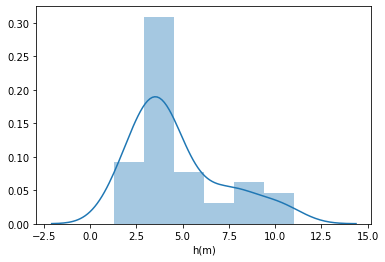

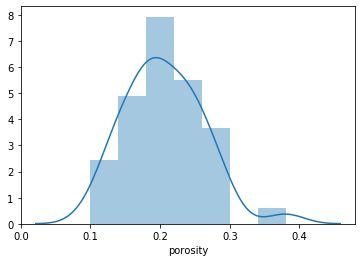

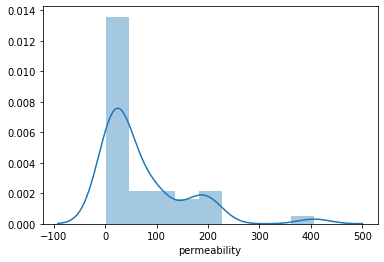

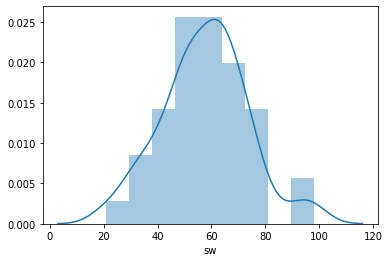

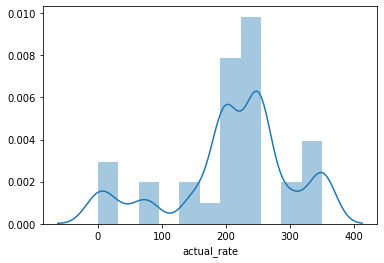

In [22]:
import seaborn as sns
num_col = ['h(m)', 'porosity', 'permeability', 'sw', 'actual_rate']
for col in num_col:
    sns.distplot(well_basic[col])
    plt.show()

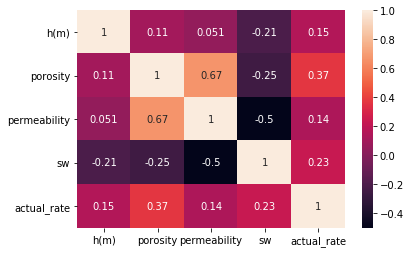

In [15]:
num_corr = well_basic[num_col].corr()
sns.heatmap(num_corr, annot = True)

In [19]:
num_corr['actual_rate'].sort_values(ascending = False)

actual_rate     1.000000
porosity        0.371301
sw              0.231319
h(m)            0.154537
permeability    0.141686
Name: actual_rate, dtype: float64

Preprocessing

In [23]:
well_origin = pd.get_dummies(well_basic)

In [24]:
#imputing data 
from sklearn.impute import SimpleImputer
numeric_columns = well_basic.select_dtypes(include='number').columns
imp = SimpleImputer (missing_values = np.nan, strategy = 'mean')
well_basic[numeric_columns] = pd.DataFrame(imp.fit_transform(well_basic[numeric_columns]), columns=numeric_columns)

In [25]:
well_basic.head()

,well,zone,top_perfo,bot_perfo,h(m),porosity,permeability,sw,actual_rate
0,A11,PHO-143,861.0,865.0,4.0,0.148,33.00,63.0,250.00
1,A12,PHO-143,888.5,892.0,3.5,0.190,27.90,57.8,250.00
2,B11,D-5b,695.0,698.0,3.0,0.140,5.22,46.0,211.25
3,B11,C-O33,534.0,536.0,2.0,0.240,172.95,39.0,187.00
4,B12,D-O5,674.0,682.0,8.0,0.230,96.60,32.0,200.00


In [26]:
#importing data for model
X = well_basic.drop(well_basic.columns[[0,1,2,3,8]], axis = 1).values
y = well_basic['actual_rate'].values
X.reshape(-1,1)
y.reshape(-1,1)

array([[250.  ],
       [250.  ],
       [211.25],
       [187.  ],
       [200.  ],
       [200.  ],
       [211.25],
       [250.  ],
       [211.25],
       [211.25],
       [250.  ],
       [250.  ],
       [211.25],
       [211.25],
       [250.  ],
       [250.  ],
       [250.  ],
       [211.25],
       [250.  ],
       [250.  ],
       [350.  ],
       [350.  ],
       [200.  ],
       [200.  ],
       [300.  ],
       [150.  ],
       [211.25],
       [350.  ],
       [350.  ],
       [300.  ],
       [ 82.  ],
       [200.  ],
       [200.  ],
       [211.25],
       [200.  ],
       [200.  ],
       [  0.  ],
       [  0.  ],
       [150.  ],
       [ 67.  ],
       [ 24.  ]])

In [27]:
print(len(X))

41


In [28]:
type(X)

numpy.ndarray

Initialize Model

In [69]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

In [34]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1)

dr = DecisionTreeRegressor (max_depth=4, random_state = SEED)
adb_reg = AdaBoostRegressor (base_estimator = dr, n_estimators = 100)

adb_reg.fit(X_train, y_train)
y_pred = adb_reg.predict(X_test)
print(y_pred)

[196.94444444 213.57142857 250.         219.75       237.08333333
 250.         250.         245.         150.        ]


In [35]:
y_adb = adb_reg.predict(X)

In [ ]:
df_adb['error'] = df_adb.apply(lambda row: (row.actual_rate - row.adb_prediction), axis = 1)

In [68]:
rmse = MSE (y_test, y_pred)**(1/2)
print(rmse)

52.47825435044712


Create Output File

In [39]:
df_adb = pd.DataFrame(y_adb)
df_adb.columns = ['adb_prediction']
df_adb = pd.concat([well_basic, df_adb], axis = 1)
df_adb.to_excel('ADB Prediction.xlsx')

In [54]:
rmse = MSE (y_test, y_pred)**(1/2)
print(rmse)

52.47825435044712
